# Statistics Question 3

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [5]:
df.shape

(100, 3)

### The dispersion of 'Blood Pressure Before (mmHg)' and 'Blood Pressure After (mmHg)'

In [6]:
import numpy as np

In [8]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [9]:
np.std(df[" Blood Pressure Before (mmHg)"])

6.56520372875054

In [15]:
np.var(df[" Blood Pressure Before (mmHg)"])

43.10189999999999

In [16]:
np.std(df[" Blood Pressure After (mmHg)"])

6.853495458523336

In [17]:
np.var(df[" Blood Pressure After (mmHg)"])

46.97039999999999

It is noticed that 'Blood Pressure Before (mmHg)' has a lower spread in data points than 'Blood Pressure After (mmHg)'

### Calculate mean and 5% confidence interval and plot it in a graph.

In [18]:
print(f"Mean of the Blood Pressure Before is: {np.mean(df[' Blood Pressure Before (mmHg)'])}")

Mean of the Blood Pressure Before is: 133.91


In [19]:
print(f"Mean of the Blood Pressure After is: {np.mean(df[' Blood Pressure After (mmHg)'])}")

Mean of the Blood Pressure After is: 128.36


In [20]:
from scipy.stats import t

In [24]:
def confidence_intervals(x: list[int], confidence: float = 0.05) -> list[float]:
    # Mean of x
    m_x = np.mean(x)
    # Standard Deviation of x
    std_x = np.std(x)
    # Degrees of freedom
    dof = len(x) - 1
    
    # Calculation of lower and upper bounds
    t_crit = np.abs(t.ppf((1-confidence)/2, dof))
    lower = m_x - std_x*t_crit/np.sqrt(len(x))
    upper = m_x + std_x*t_crit/np.sqrt(len(x))

    return [lower, upper]

Confidence interval for ' Blood Pressure Before (mmHg)'

In [25]:
x = df[" Blood Pressure Before (mmHg)"]

lower_x, upper_x = confidence_intervals(x, 0.05)

print(lower_x, upper_x)

133.86872722131565 133.95127277868434


In [26]:
y = df[" Blood Pressure After (mmHg)"]

lower_y, upper_y = confidence_intervals(y, 0.05)
print(lower_y, upper_y)

128.31691484789192 128.4030851521081


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

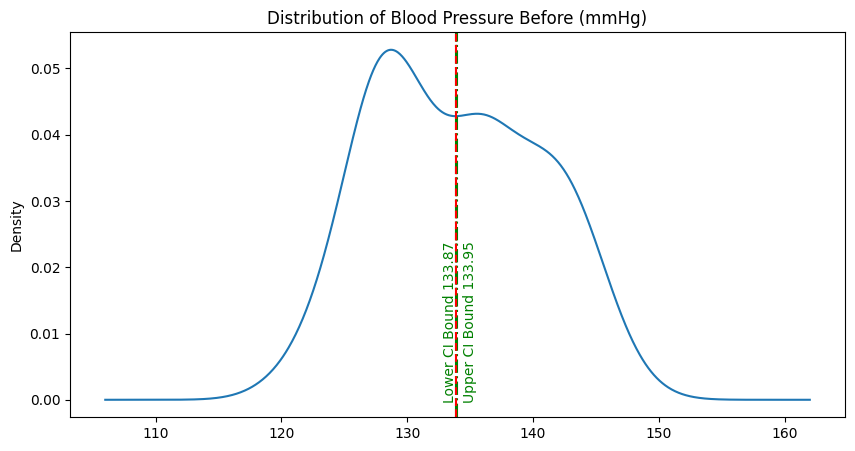

In [47]:
figure, ax = plt.subplots(figsize = (10,5))
ax = df[" Blood Pressure Before (mmHg)"].plot.kde()
ax.axvline(x=lower_x, color = "green", linestyle="-.")
ax.axvline(x=upper_x, color = "green", linestyle="-.")
ax.axvline(x=np.mean(df[" Blood Pressure Before (mmHg)"]), color = 'red', linestyle="--")
plt.title("Distribution of Blood Pressure Before (mmHg)")
ax.text(x=lower_x-1, y=0, s=f'Lower CI Bound {round(lower_x, 2)}', color='green', rotation=90)
ax.text(x=upper_x+0.5, y=0, s=f'Upper CI Bound {round(upper_x, 2)}', color='green', rotation=90)
plt.show()

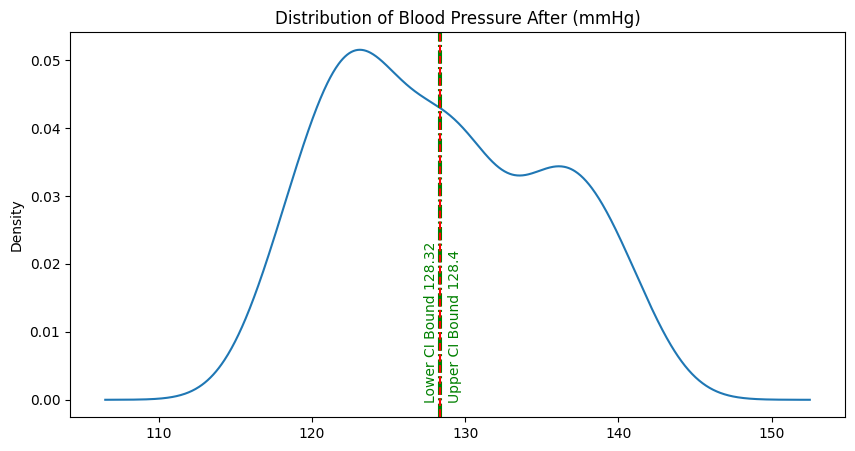

In [46]:
figure, ax = plt.subplots(figsize = (10,5))
ax = df[" Blood Pressure After (mmHg)"].plot.kde()
ax.axvline(x=lower_y, color = "green", linestyle="-.")
ax.axvline(x=upper_y, color = "green", linestyle="-.")
ax.axvline(x=np.mean(df[" Blood Pressure After (mmHg)"]), color = 'red', linestyle="--")
plt.title("Distribution of Blood Pressure After (mmHg)")
ax.text(x=lower_y-1, y=0, s=f'Lower CI Bound {round(lower_y, 2)}', color='green', rotation=90)
ax.text(x=upper_y+0.5, y=0, s=f'Upper CI Bound {round(upper_y, 2)}', color='green', rotation=90)
plt.show()

### Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [49]:
# Standard Deviation
print(f'Standard Deviation: {round(np.std(df[" Blood Pressure After (mmHg)"]), 2)}')

# Mean Absolute Deviation
print(f'Mean Absolute Deviation: {(df[" Blood Pressure After (mmHg)"].mad())}')

Standard Deviation: 6.85
Mean Absolute Deviation: 5.9


<ipython-input-49-f9a52d3f4fcf>:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print(f'Mean Absolute Deviation: {(df[" Blood Pressure After (mmHg)"].mad())}')


In [50]:
# Standard Deviation
print(f'Standard Deviation: {round(np.std(df[" Blood Pressure Before (mmHg)"]), 2)}')

# Mean Absolute Deviation
print(f'Mean Absolute Deviation: {(df[" Blood Pressure Before (mmHg)"].mad())}')

Standard Deviation: 6.57
Mean Absolute Deviation: 5.7118


<ipython-input-50-0e7d74da3c5f>:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print(f'Mean Absolute Deviation: {(df[" Blood Pressure Before (mmHg)"].mad())}')


As the MAD for 'Blood Before After' is higher than 'Blood Pressure Before'. It indicates, that mean of 'Blood Before After' is less relevant than 'Blood Pressure Before'. This is also indicated by Standard Deviation as Std is higher for the column with higher MAD.

### Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [52]:
from scipy.stats import pearsonr

In [53]:
x = df[" Blood Pressure Before (mmHg)"]
y = df[" Blood Pressure After (mmHg)"]

In [55]:
#extract correlation coefficient (rounded to 4 decimal places)
r = round(pearsonr(x, y)[0], 4)

print(f"Correlation Coefficient is: {r}")

#extract p-value (rounded to 4 decimal places) 
p = round(pearsonr(x, y)[1], 4)

print(f"P-Value: {p}")

Correlation Coefficient is: 0.9779
P-Value: 0.0


Since the correlation coefficient is close to 1, this tells us that there is a strong positive association between the two variables.

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.